In [1]:
import h5py
import matplotlib.pyplot as plt
import h5flow
import numpy as np
from h5flow.data import H5FlowDataManager

In [35]:
#Get Mod1 gains from csv file

def make_gains():
    f_gains = "mod1_gain_corrected.csv"
    corrections = np.loadtxt(f_gains, skiprows = 1, delimiter = ',', usecols = [0,1,-1], dtype=[('ADC_ID', int), ('ADC_ch', int), ('GAIN_CORR',float)])

    file = open("gains.yaml", 'w')

    file.write("default : 0.0000e+00\n")
    for i_ADC in np.unique(corrections['ADC_ID']):
        
        correction_ADC = correction[correction['ADC_ID'] == i_ADC]
        
        file.write("{} :\n".format(i_ADC))
        
        for e in corrections:
            if e['ADC_ID']==i_ADC:
                file.write("  {} : {}\n".format(e['ADC_ch'], 1/(4*e['GAIN_CORR'])))

    file.close()

make_gains()

In [22]:
# File was generated with ./run_light_flow-keep_wvfm.sh
filename = "0cd913fb_20220211_074023.data.module1_flow.h5"

In [23]:
f = h5py.File(filename, 'r')

In [24]:
cwvfm = f['light/cwvfm/data']
swvfm = f['light/swvfm/data']

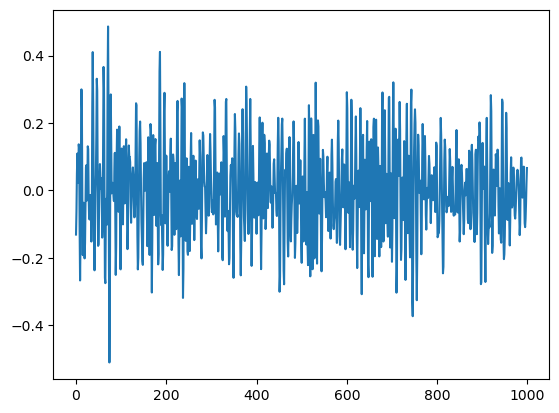

In [25]:
plt.plot(cwvfm[5][0][0,4])
plt.show()

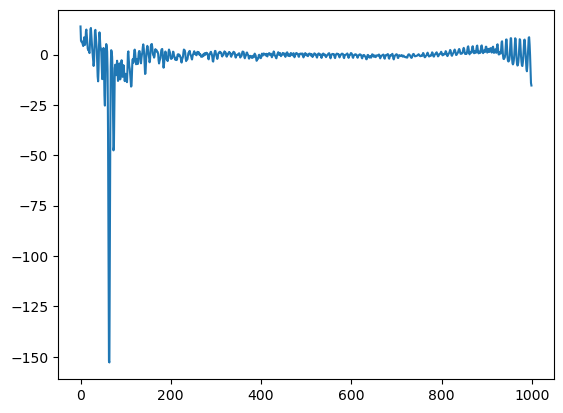

In [26]:
plt.plot(swvfm[3][0][0,0])

In [27]:
n_events = len(cwvfm)
cwvfm_slice = np.zeros((n_events, 2, 64, 25))
swvfm_slice = np.zeros((n_events, 2, 16, 25))

In [28]:
for e in range(n_events):
    cwvfm_slice[e] = cwvfm[e][0][:,:,25:50]


In [29]:
cwvfm_thresholds = 3*cwvfm_slice.std(axis=-1).mean(axis=0)
print(cwvfm_thresholds)

[[ 0.          0.          0.          0.          0.85630956  0.8862136
   0.92054453  0.93617574  0.88753348  0.89518744  0.85645633  0.81847515
   0.84531431  0.87963329  0.84039576  0.8445361   0.          0.
   0.          0.          0.86638523  0.53159895  0.58070245  0.97360944
   0.91088244  0.96694504  0.924348    0.88628673  0.90806879  0.92272232
   0.92867751  0.88577671  0.          0.          0.          0.
   0.86045093 32.80868591  0.85704635  0.93779352  0.86831662  0.85683257
   0.88452258  0.86232209  0.89271747  0.          0.90929493  0.90171325
   0.          0.          0.          0.          0.68514705  0.85709931
   0.          0.76230979  0.87206963  0.83934917  0.92435045  0.93261156
   0.94449678  0.97629307  0.95173993  0.9516315 ]
 [ 0.          0.          0.          0.          2.32108085  2.22180059
   2.15929829  2.12915832  2.33025229  2.32706998  2.13338809  2.31463201
   1.90872394  1.88808119  1.75645171  1.70887925  0.          0.
   0.       

In [30]:
file = open("sipm_threshold.yaml", 'w')
for adc in range(len(cwvfm_thresholds)):
    file.write("{}:\n".format(adc))
    for channel in range(len(cwvfm_thresholds[adc])):
        threshold = cwvfm_thresholds[adc, channel]
        if threshold == 0:
            continue
        file.write("  {}: {}\n".format(channel, threshold))
file.close()

In [31]:
for e in range(n_events):
    swvfm_slice[e] = swvfm[e][0][:,:,25:50]


In [32]:
swvfm_thresholds = 3*swvfm_slice.std(axis=-1).mean(axis=0)
print(3*swvfm_slice.std(axis=-1).mean(axis=0))

[[ 4.10118387  1.46161274  1.50291913  1.46763426  3.32043883  1.56797126
   1.58084211  1.56757699 13.68600311  5.32720535  5.15836258  4.11340848
  15.81276914  4.75265095  4.25587073  3.57949502]
 [12.18258831  4.21794029  3.57768999  3.21844277 14.03869786  4.26362175
   4.01890739  3.61838895 33.34162994  1.51097815  0.89271747  1.56207255
   2.8988711   1.60809107  1.65946382  1.64360701]]


In [33]:
file = open("sum_threshold.yaml", 'w')
for adc in range(len(swvfm_thresholds)):
    file.write("{}:\n".format(adc))
    for channel in range(len(swvfm_thresholds[adc])):
        threshold = swvfm_thresholds[adc, channel]
        if threshold == 0:
            continue
        file.write("  {}: {}\n".format(channel, threshold))
file.close()

In [20]:
cwvfm_thresholds_old = cwvfm_thresholds[:]
swvfm_thresholds_old = swvfm_thresholds[:]

In [21]:
f.close()

In [72]:
corrections_ADC = corrections[corrections['ADC_ID']==1]
corrections_ADC_sorted = corrections_ADC[np.argsort(corrections_ADC['ADC_ch'])]
corrections_ADC_sorted['GAIN_CORR']

array([199.361, 191.136, 190.028, 197.019, 201.707, 198.163, 188.198,
       192.387, 198.734, 201.794, 183.596, 197.969, 202.186, 197.613,
       198.758, 197.669, 198.18 , 190.919, 186.679, 200.382, 189.244,
       191.164, 191.957, 186.651, 196.843, 194.068, 195.515, 198.242,
       200.72 , 198.667, 187.2  , 188.823, 190.321, 196.587, 186.735,
       200.242, 191.801, 199.77 , 199.644, 250.901, 200.794, 200.319,
       191.09 , 195.387, 203.038, 190.651, 225.224, 217.967])

In [73]:
ratio = cwvfm_thresholds_old[1]/cwvfm_thresholds[1]
ratio[np.isfinite(ratio)]*(1./(4.*corrections_ADC_sorted['GAIN_CORR']))

/tmp/ipykernel_919350/241587377.py:1: RuntimeWarning: invalid value encountered in divide
  ratio = cwvfm_thresholds_old[1]/cwvfm_thresholds[1]


array([0.022857, 0.022857, 0.022857, 0.022857, 0.022857, 0.022857,
       0.022857, 0.022857, 0.022857, 0.022857, 0.022857, 0.022857,
       0.022857, 0.022857, 0.022857, 0.022857, 0.022857, 0.022857,
       0.022857, 0.022857, 0.022857, 0.022857, 0.022857, 0.022857,
       0.022857, 0.022857, 0.022857, 0.022857, 0.022857, 0.022857,
       0.022857, 0.022857, 0.022857, 0.022857, 0.022857, 0.022857,
       0.022857, 0.022857, 0.022857, 0.022857, 0.022857, 0.022857,
       0.022857, 0.022857, 0.022857, 0.022857, 0.022857, 0.022857])

In [44]:
ratio = (cwvfm_thresholds_old/cwvfm_thresholds).reshape(128)
ratio[np.isfinite(ratio)]*(1./(4.*corrections['GAIN_CORR']))

/tmp/ipykernel_919350/3027982451.py:1: RuntimeWarning: divide by zero encountered in divide
  ratio = (cwvfm_thresholds_old/cwvfm_thresholds).reshape(128)
/tmp/ipykernel_919350/3027982451.py:1: RuntimeWarning: invalid value encountered in divide
  ratio = (cwvfm_thresholds_old/cwvfm_thresholds).reshape(128)


array([0.022857  , 0.022857  , 0.022857  , 0.022857  , 0.022857  ,
       0.022857  , 0.022857  , 0.022857  , 0.022857  , 0.022857  ,
       0.022857  , 0.022857  , 0.022857  , 0.022857  , 0.022857  ,
       0.022857  , 0.022857  , 0.022857  , 0.022857  , 0.022857  ,
       0.022857  , 0.022857  , 0.022857  , 0.022857  , 0.022857  ,
       0.022857  , 0.022857  , 0.022857  , 0.022857  , 0.022857  ,
       0.022857  , 0.022857  , 0.022857  , 0.022857  , 0.022857  ,
       0.022857  , 0.022857  , 0.022857  , 0.022857  , 0.022857  ,
       0.022857  , 0.022857  , 0.022857  , 0.022857  , 0.022857  ,
       0.022857  , 0.022857  , 0.022857  , 0.022857  , 0.022857  ,
       0.022857  , 0.022857  , 0.022857  , 0.022857  , 0.022857  ,
       0.022857  , 0.022857  , 0.022857  , 0.022857  , 0.022857  ,
       0.022857  , 0.022857  , 0.022857  , 0.022857  , 0.022857  ,
       0.022857  , 0.022857  , 0.022857  , 0.022857  , 0.022857  ,
       0.02318383, 0.02268783, 0.02254258, 0.02257482, 0.02309

In [35]:
f_gains = "mod1_gain_corrected.csv"
corrections = np.loadtxt(f_gains, skiprows = 1, delimiter = ',', usecols = [0,1,-1], dtype=[('ADC_ID', int), ('ADC_ch', int), ('GAIN_CORR',float)])


In [64]:
corrections_ADC = corrections[corrections['ADC_ID']==0]
corrections_ADC_sorted = corrections_ADC[np.argsort(corrections_ADC['ADC_ch'])]
corrections_ADC_sorted['GAIN_CORR']

array([207.93 , 199.9  , 200.262, 201.94 , 198.419, 197.553, 196.456,
       206.718, 200.717, 198.258, 196.077, 202.652, 202.69 , 203.125,
       205.075, 198.691, 202.749, 198.375, 195.295, 201.347, 209.502,
       193.475, 197.862, 203.789, 191.015, 198.202, 199.183, 191.373,
       200.287, 202.072, 193.047, 200.075, 193.333, 188.395, 189.923,
       235.451, 195.072, 211.011, 194.2  , 206.214, 194.451, 192.418,
       192.797, 188.426, 183.181, 194.376])

In [47]:
corrections['ADC_ID']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [56]:
for i_ADC in np.unique(corrections['ADC_ID']):

    correction_ADC = corrections[corrections['ADC_ID'] == i_ADC]
    sorted_indices = np.argsort(correction_ADC['ADC_ch'])
    print(correction_ADC['ADC_ch'][sorted_indices])

[ 4  5  6  7  8  9 10 11 12 13 14 15 20 21 22 23 24 25 26 27 28 29 30 31
 36 37 38 39 40 41 42 43 44 46 47 52 53 55 56 57 58 59 60 61 62 63]
[ 4  5  6  7  8  9 10 11 12 13 14 15 20 21 22 23 24 25 26 27 28 29 30 31
 36 37 38 39 40 41 42 43 44 45 46 47 52 53 54 55 56 57 58 59 60 61 62 63]
